In [52]:
# Notebook Import

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Constants

TRAINING_DATA_FILE="SpamData/02_Training/trian-data.txt"
TEST_DATA_FILE="SpamData/02_Training/test-data.txt"

TOKEN_SPAM_PROB_FILE="SpamData/02_Training/prob-spam.txt"
TOKEN_HAM_PROB_FILE="SpamData/02_Training/prob-ham.txt"
TOKEN_ALL_PROB_FILE="SpamData/02_Training/prob-all-tokens.txt"

TEST_FEATURE_MATRIX="SpamData/03_Testing/test-features.txt"
TEST_TARGET_FILE="SpamData/03_Testing/test-target.txt"


VOCAB_SIZE=2500

## Load the Data

In [2]:
# Features
X_test=np.loadtxt(TEST_FEATURE_MATRIX, delimiter=' ')
# Target
y_test=np.loadtxt(TEST_TARGET_FILE, delimiter=' ')

#Tokens
prob_spam_tokens=np.loadtxt(TOKEN_SPAM_PROB_FILE)
prob_ham_tokens=np.loadtxt(TOKEN_HAM_PROB_FILE)
prob_all_tokens=np.loadtxt(TOKEN_ALL_PROB_FILE)

In [3]:
X_test.shape

(1150, 2500)

In [4]:
prob_spam_tokens.shape

(2500,)

In [5]:
print("Dot product of X_test and prob Spam tokens is :", X_test.dot(prob_spam_tokens).shape)

Dot product of X_test and prob Spam tokens is : (1150,)


## Set the Prior

$$P(Spam \,|\,X)=\frac{P(X\,|\,Spam) \, P(Spam)}{P(X)} $$

In [6]:
PROB_SPAM=0.3219

In [7]:
prob_spam_tokens

array([1.03315405e-02, 5.02387783e-03, 7.05471282e-03, ...,
       1.01985163e-04, 7.98144757e-05, 1.10853438e-04])

In [8]:
log_spam_tokens=np.log(prob_spam_tokens)

## Joint Probability in Log Format

In [9]:
#joint_log_spam=P(Token|Spam)-P(Tokens)+P(Spam)

joint_log_spam=X_test.dot(np.log(prob_spam_tokens)-np.log(prob_all_tokens))+np.log(PROB_SPAM)
joint_log_ham=X_test.dot(np.log(prob_ham_tokens)-np.log(prob_all_tokens))+np.log(1-PROB_SPAM)

In [10]:
X_test

array([[6., 1., 1., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       ...,
       [3., 1., 0., ..., 0., 0., 0.],
       [3., 1., 0., ..., 0., 0., 0.],
       [2., 2., 0., ..., 0., 0., 0.]])

In [11]:
joint_log_ham

array([  -9.91765214, -119.90943148,  -19.63998512, ...,   -0.86416002,
         -5.30029665,   -0.17041288])

## Making Predictions - Checking for higher joint probability

 $$ P(Spam|X) > P(Ham|X) $$
 <br>
  $$ P(Ham|X) > P(Spam|X) $$

In [19]:
prediction =joint_log_spam>joint_log_ham

In [21]:
prediction*1

array([1, 1, 1, ..., 0, 0, 0])

## Simplify

In [22]:
joint_log_spam=X_test.dot(np.log(prob_spam_tokens))+np.log(PROB_SPAM)
joint_log_ham=X_test.dot(np.log(prob_ham_tokens))+np.log(1-PROB_SPAM)

## Metrics And Evaluation

In [27]:
correct_docs=(y_test==prediction).sum()
print("Documents classified correctly", correct_docs)
numdocs_wrong=X_test.shape[0]-correct_docs
print("Docs incorrrectly Classified",  numdocs_wrong)

Documents classified correctly 1113
Docs incorrrectly Classified 37


In [28]:
Accuracy=correct_docs/X_test.shape[0]


In [32]:
Accuracy

0.9678260869565217

In [37]:
fraction_wrong=numdocs_wrong/X_test.shape[0]
print("Fraction classified incorrectly {:.2%}".format(fraction_wrong))
print("Accuracy of the model {:.2%}".format(Accuracy))

Fraction classified incorrectly 3.22%
Accuracy of the model 96.78%


## Visualising the Results

In [43]:
# Chart Styling
yaxis_label='P(X|Spam)'
xaxis_label='P(X|NonSpam)'

linedata=np.linspace(start=-14000, stop=1, num=1000)

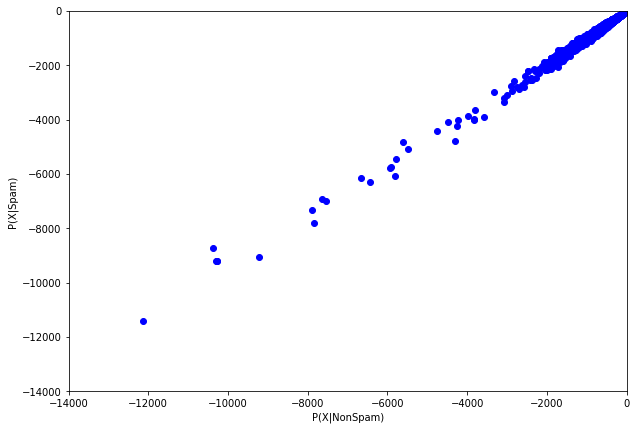

In [44]:
plt.figure(figsize=[10,7])
plt.xlabel(xaxis_label,fontsize=10)
plt.ylabel(yaxis_label,fontsize=10)
plt.xlim([-14000,1])
plt.ylim([-14000,1])

plt.scatter(joint_log_ham,joint_log_spam, color="blue")

## Decision Boundary

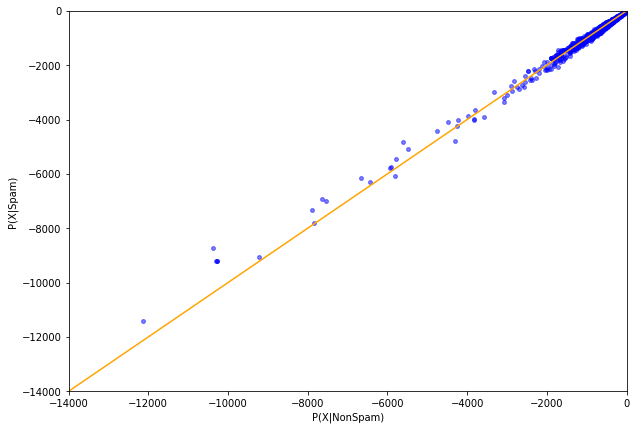

In [47]:
plt.figure(figsize=[10,7])
plt.xlabel(xaxis_label,fontsize=10)
plt.ylabel(yaxis_label,fontsize=10)
plt.xlim([-14000,1])
plt.ylim([-14000,1])

plt.scatter(joint_log_ham,joint_log_spam, color="blue",alpha=0.5, s=15)
plt.plot(linedata, linedata,color="Orange")

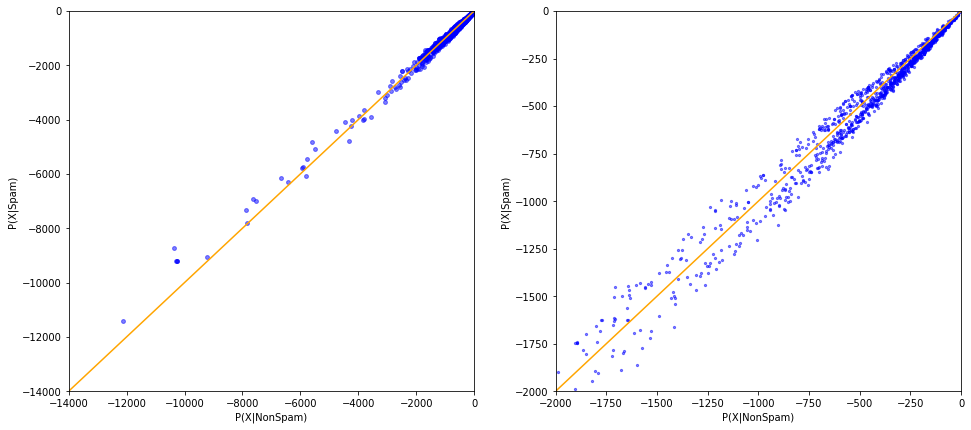

In [51]:
plt.figure(figsize=[16,7])

plt.subplot(1,2,1)
plt.xlabel(xaxis_label,fontsize=10)
plt.ylabel(yaxis_label,fontsize=10)
plt.xlim([-14000,1])
plt.ylim([-14000,1])

plt.scatter(joint_log_ham,joint_log_spam, color="blue",alpha=0.5, s=15)
plt.plot(linedata, linedata,color="Orange")

plt.subplot(1,2,2)
plt.xlabel(xaxis_label,fontsize=10)
plt.ylabel(yaxis_label,fontsize=10)
plt.xlim([-2000,1])
plt.ylim([-2000,1])
plt.scatter(joint_log_ham,joint_log_spam, color="blue",alpha=0.5, s=5)
plt.plot(linedata, linedata,color="Orange")

In [53]:
## Seaborn Charts

sns.set_style('whitegrid')
labels="Actual Category"

summary_df=pd.DataFrame({yaxis_label:joint_log_spam,xaxis_label:joint_log_ham, labels:y_test})

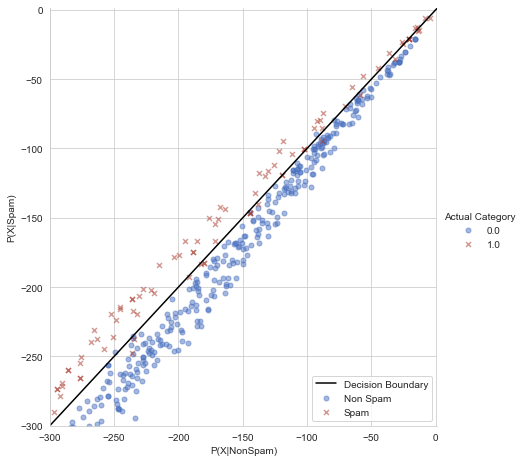

In [75]:

my_colors=['#4A71C0','#AB3A2C']
sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, height=6.5, fit_reg=False,
          scatter_kws={'alpha':0.5,'s':25}, hue=labels,markers=['o','x'],palette=my_colors)

plt.xlim([-300,1])
plt.ylim([-300,1])

sns.lineplot(linedata, linedata,color='black')

plt.legend(('Decision Boundary','Non Spam','Spam'), loc='lower right',fontsize=10)